Vamos a calcular la media, mediana y moda de nuestra variable (Longitud) a partir de la base de datos Tortugas.xls

In [57]:
import pandas as pd
import numpy as np

# Cargar datos desde el archivo Excel (ajusta la ruta si es necesario)
tortugas = pd.read_excel('Tortugas.xls')

# Seleccionar la columna LONGITUD y eliminar valores nulos
#tortugas = df['LONGITUD'].dropna()

# Calcular estadísticas
media = tortugas['LONGITUD'].mean()
mediana = tortugas['LONGITUD'].median()
moda = tortugas['LONGITUD'].mode()  # puede contener múltiples valores

# Mostrar resultados cómo salidas numéricas
print(f"Media de LONGITUD: {media}")
print(f"Mediana de LONGITUD: {mediana}")
if len(moda) == 0:
	print("Moda de LONGITUD: no hay valores válidos")
elif len(moda) == 1:
	print(f"Moda de LONGITUD: {int(moda.iloc[0])}")
else:
	print(f"Modas de LONGITUD: {list(map(int, moda.values))}")

Media de LONGITUD: 124.70833333333333
Mediana de LONGITUD: 122.0
Modas de LONGITUD: [103, 133]


Podemos observar que la media es de 124.708 cm.

In [58]:
# Calcular varianza y desviación estándar de LONGITUD

# Varianza y std muestral (ddof=1, por defecto en pandas)
var_muestral = tortugas['LONGITUD'].var()
std_muestral = tortugas['LONGITUD'].std()

print(f"Varianza (muestral, ddof=1): {var_muestral}")
print(f"Desviación estándar (muestral, ddof=1): {std_muestral}")

Varianza (muestral, ddof=1): 420.0407801418439
Desviación estándar (muestral, ddof=1): 20.494896441354467


Con la desviación estándar, podemos notar que el ancho de las tortugas se centra en +-20.495 cm.

Graficamos una caja de alambres para ver datos atípicos

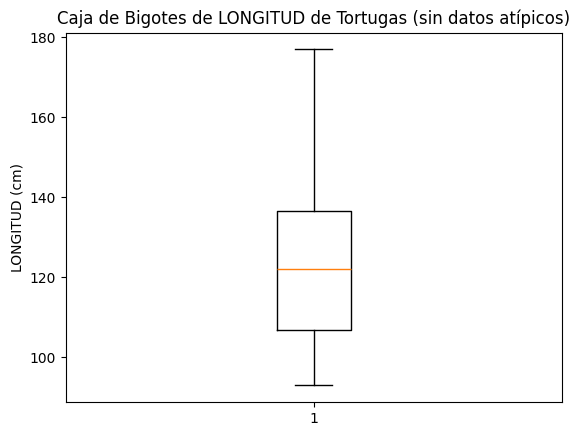

In [59]:
# Caja de bigotes (boxplot) para LONGITUD
import matplotlib.pyplot as plt
plt.boxplot(tortugas['LONGITUD'])
plt.title('Caja de Bigotes de LONGITUD de Tortugas (sin datos atípicos)')
plt.ylabel('LONGITUD (cm)')
plt.show()

No hay necesidad de quitar valores atípicos, asi que proseguimos haciendo un histograma de la variable 'LONGITUD'.

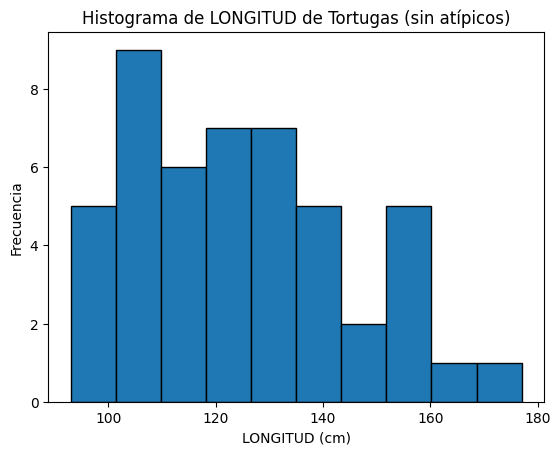

In [60]:
# Histograma de LONGITUD
import matplotlib.pyplot as plt
plt.hist(tortugas['LONGITUD'], bins=10, edgecolor='black')
plt.title('Histograma de LONGITUD de Tortugas (sin atípicos)')
plt.xlabel('LONGITUD (cm)')
plt.ylabel('Frecuencia')
plt.show()

In [61]:
# Sesgo y curtosis
sesgo = tortugas['LONGITUD'].skew()
curtosis = tortugas['LONGITUD'].kurtosis()
print(f"Sesgo de LONGITUD: {sesgo}")
print(f"Curtosis de LONGITUD: {curtosis}")
# Como el sesgo es positivo, los datos están recargados a la derecha. La curtosis negativa indica que la distribución es más plana que una distribución normal.

Sesgo de LONGITUD: 0.49353821480994836
Curtosis de LONGITUD: -0.4402774330713819


Como el sesgo es positivo, los datos están recargados a la derecha. La curtosis negativa indica que la distribución es más plana que una distribución normal.

Ahora empecemos a comparar la variable LONGITUD respecto al sexo, es decir, vamos a comparar hembras contra machos.

In [62]:
# Vamos a calcular media, mediana y moda para LONGITUD según el sexo
media_machos = tortugas[tortugas['SEXO'] == 'm']['LONGITUD'].mean()
media_hembras = tortugas[tortugas['SEXO'] == 'f']['LONGITUD'].mean()
mediana_machos = tortugas[tortugas['SEXO'] == 'm']['LONGITUD'].median()
mediana_hembras = tortugas[tortugas['SEXO'] == 'f']['LONGITUD'].median()
moda_machos = tortugas[tortugas['SEXO'] == 'm']['LONGITUD'].mode()
moda_hembras = tortugas[tortugas['SEXO'] == 'f']['LONGITUD'].mode()
print(f"Media de LONGITUD para machos: {media_machos}")
print(f"Media de LONGITUD para hembras: {media_hembras}")
print(f"Mediana de LONGITUD para machos: {mediana_machos}")
print(f"Mediana de LONGITUD para hembras: {mediana_hembras}")
if len(moda_machos) == 0:
	print("Moda de LONGITUD para machos: no hay valores válidos")
elif len(moda_machos) == 1:
	print(f"Moda de LONGITUD para machos: {int(moda_machos.iloc[0])}")
else:
	print(f"Modas de LONGITUD para machos: {list(map(int, moda_machos.values))}")
if len(moda_hembras) == 0:
	print("Moda de LONGITUD para hembras: no hay valores válidos")
elif len(moda_hembras) == 1:
	print(f"Moda de LONGITUD para hembras: {int(moda_hembras.iloc[0])}")
else:
	print(f"Modas de LONGITUD para hembras: {list(map(int, moda_hembras.values))}")

Media de LONGITUD para machos: 111.5909090909091
Media de LONGITUD para hembras: 133.0
Mediana de LONGITUD para machos: 113.5
Mediana de LONGITUD para hembras: 135.0
Modas de LONGITUD para machos: [117, 120]
Moda de LONGITUD para hembras: 133


Con lo anterior, las hembras en promedio tienen un caparazón más grande que los machos

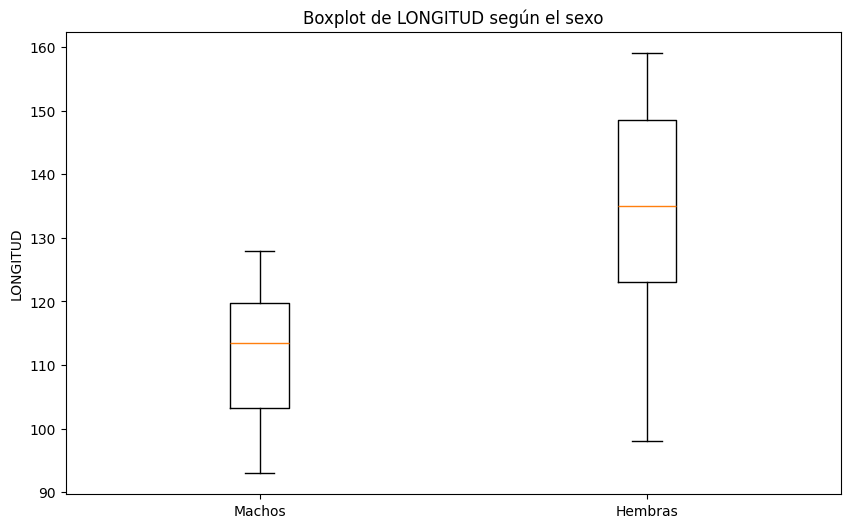

In [63]:
# Boxplot de LONGITUD según el sexo
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot([tortugas[tortugas['SEXO'] == 'm']['LONGITUD'], tortugas[tortugas['SEXO'] == 'f']['LONGITUD']], tick_labels=['Machos', 'Hembras'])
plt.title('Boxplot de LONGITUD según el sexo')
plt.ylabel('LONGITUD')
plt.show()

Notemos que la dispersión es más grande para las hembras que para los machos. Por lo que, tenemos que hay hembras muy pequeñas o muy grandes, mientras que los machos tienden a tener en promedio la misma longitud.

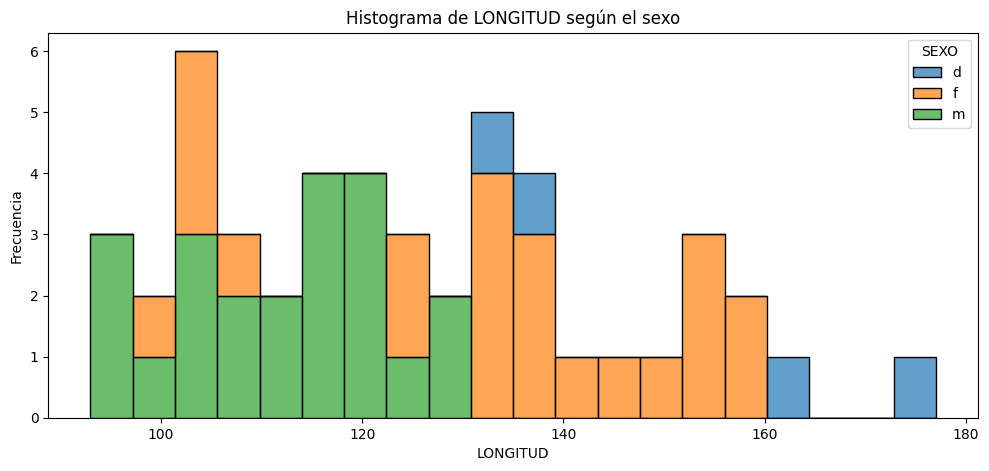

In [64]:
# Generar los dos histogramas de LONGITUD según el sexo en una mismo gráfico usando sns
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 5))
sns.histplot(data=tortugas, x='LONGITUD', hue='SEXO', bins=20, alpha=0.7, multiple='stack')
plt.title('Histograma de LONGITUD según el sexo')
plt.xlabel('LONGITUD')
plt.ylabel('Frecuencia')
plt.show()

In [65]:
# Sesgo y curtosis registrados por sexo
sesgo_machos = tortugas[tortugas['SEXO'] == 'm']['LONGITUD'].skew()
curtosis_machos = tortugas[tortugas['SEXO'] == 'm']['LONGITUD'].kurtosis()
sesgo_hembras = tortugas[tortugas['SEXO'] == 'f']['LONGITUD'].skew()
curtosis_hembras = tortugas[tortugas['SEXO'] == 'f']['LONGITUD'].kurtosis()
print(f"Sesgo de LONGITUD para machos: {sesgo_machos}")
print(f"Curtosis de LONGITUD para machos: {curtosis_machos}")
print(f"Sesgo de LONGITUD para hembras: {sesgo_hembras}")
print(f"Curtosis de LONGITUD para hembras: {curtosis_hembras}")

Sesgo de LONGITUD para machos: -0.2548792881747001
Curtosis de LONGITUD para machos: -0.9877635415922827
Sesgo de LONGITUD para hembras: -0.4694409509990694
Curtosis de LONGITUD para hembras: -0.8943132923690738


Conclusión: El caparazón de las hembras tiene longitud más variable que el de los machos, además de que el de estos suele ser pequeño a comparación del de las hembras. Además, de que ambas especies tienden a tener caparaones por encima de la media, sobretodo las hembras.

In [ ]:
# Convertir archivo a HTML
